# Robust Regression 

## Initialization

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## Data Generation

In [2]:
np.random.seed(42)
N = 1000
X = np.random.randn(N, 1)
y = 1 - 0.5 * X + X ** 2 + 0.01 * np.random.randn(N, 1)

In [10]:
out = np.abs(20 + 0.1 *np.random.randn(100, 1))
X_out = np.zeros((700, 1))
outlier = np.vstack((X_out, out))
np.random.shuffle(outlier)

In [11]:
one_vector = np.ones((N, 1))
input_data = np.hstack((one_vector, X, X**2, X**3, X**4, X**5))
X_train, X_test, y_train, y_test = train_test_split(input_data, y, test_size=0.2, shuffle=True)

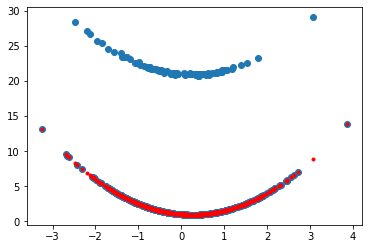

In [12]:
out_train = y_train + outlier
plt.plot(X_train[:, 1], y_train + outlier, 'o')
plt.plot(X_train[:, 1], y_train, 'r.')

[[ 3.50291202]
 [-1.19264028]
 [ 1.01822894]
 [ 0.19089993]
 [-0.01908995]
 [-0.00542625]]


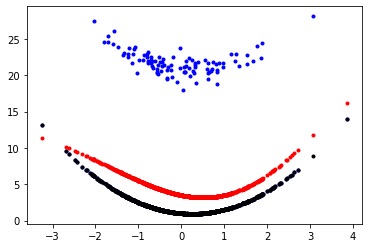

In [6]:
X_T_X_train = np.matmul(X_train.T, X_train)
X_T_Y_train = np.matmul(X_train.T, out_train)
old_W = np.matmul(np.linalg.inv(X_T_X_train), X_T_Y_train)
y_pre_tr = np.matmul(X_train, old_W)
print(old_W)
plt.plot(X_train[:,1], out_train, 'b.')
plt.plot(X_train[:,1], y_train, 'k.')
plt.plot(X_train[:,1], y_pre_tr, 'r.')
plt.show()

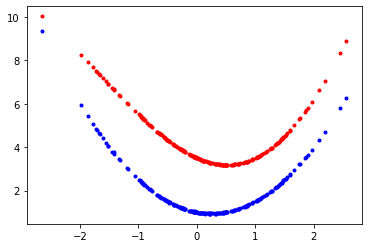

In [7]:
y_pre_te = np.matmul(X_test,old_W)
plt.plot(X_test[:,1], y_pre_te, 'r.')
plt.plot(X_test[:,1], y_test, 'b.')

In [14]:
i = 0
k = 0
while i == 0:
    k += 1
    print(k)
    y_pre_tr = np.matmul(X_train, old_W)
    Error = out_train - y_pre_tr

    # TODO: remove -1 and run to see if it converges !
    kernel = np.exp(-np.abs(Error))  # note: must include -1
    weights = np.diagflat(np.matrix(kernel))
    W_inverse = np.linalg.inv(weights)
    X_T_Q_train = np.matmul(X_train.T, W_inverse)
    X_T_Q_X_train = np.matmul(X_T_Q_train, X_train)
    X_T_Q_Y_train = np.matmul(X_T_Q_train, out_train)
    new_W = np.matmul(np.linalg.inv(X_T_Q_X_train), X_T_Q_Y_train)
    print(new_W)
    if np.linalg.norm(new_W) > 5:
        old_W = new_W
    else:
        W = new_W
        i = 1
W

1
[[ 1.00038614e+00]
 [-5.00144834e-01]
 [ 1.00006369e+00]
 [-2.74313976e-04]
 [ 3.48165341e-05]
 [ 2.78635195e-05]]


matrix([[ 1.00038614e+00],
        [-5.00144834e-01],
        [ 1.00006369e+00],
        [-2.74313976e-04],
        [ 3.48165341e-05],
        [ 2.78635195e-05]])

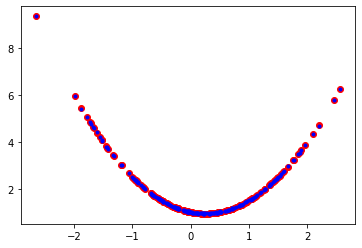

In [9]:
y_pre_te = np.matmul(X_test,W)
plt.plot(X_test[:,1], y_pre_te, 'ro')
plt.plot(X_test[:,1], y_test, 'b.')